In [142]:
# pip install nltk

In [143]:
# pip install wordcloud

In [144]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords,wordnet
from wordcloud import WordCloud , STOPWORDS
import warnings
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

warnings.filterwarnings('ignore')
%matplotlib inline

In [145]:
df = pd.read_csv("tweet.csv")

In [146]:
df=df.sample(5000)

In [147]:
df.shape

(5000, 2)

In [148]:
df.head()

,tweets,class
63550,When your gf scotch pancakes from @marksandspe...,sarcasm
27640,So cute: @realDonaldTrump doesn't get his way-...,irony
4073,Lunch by myself how lovely 😊 #Sarcasm,figurative
47907,@arrivanorthwest Experiment over; x30 1hr late...,regular
44837,No GOD No PEACE? Then KNOW #God KNOW #Peace &a...,regular


In [149]:
# df["tweets"][0]

In [150]:
df["class"].value_counts()

figurative    1317
irony         1286
sarcasm       1249
regular       1148
Name: class, dtype: int64

# checking null value

In [151]:
df.isna().sum()

tweets    0
class     0
dtype: int64

In [152]:
df.duplicated().sum()

1

In [153]:
df.drop_duplicates(inplace=True)

In [154]:
df.duplicated().sum()

0

In [155]:
df[df["tweets"].duplicated()]

,tweets,class
32208,5 years later and I'm dating the biggest scrub...,irony
27819,It's like rain on your wedding day \nIt's a fr...,irony
7298,".@timcourtney [headslap] @LEGO_Group ""Friends""...",figurative
12003,Tebow didn't get out of the box. #ironic,figurative
23936,"Most #Ironic moment ever...Tomorrow, the #Exec...",irony
27515,"@MrOzAtheist A group called MarriageAll, who w...",irony
15122,we hired an outsider to advise us on how we co...,figurative
16246,"Human Society takes care of #Gaza, #Syria, #Af...",figurative
12525,Brunch fabulousness. #ironic #badercookeleganz...,figurative
16024,@sillymrhawkins @PositiveLad A stupid lying US...,figurative


In [156]:
13362/81408*100

16.41362028301887

16% data are duplicated which is greater than 10% we cannot remove

In [157]:
df.describe()

,tweets,class
count,4999,4999
unique,4947,4
top,@BWI_Airport Could possibly have the rudest TS...,figurative
freq,2,1317


# Data Cleaning 

In [158]:
def clean_text(text):
    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # Remove links
    text = re.sub(r'http\S+', '', text)
    
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove non-english alphabets
    text = ''.join([i for i in text if i.isalpha() or i.isspace()])

    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove stopwords and lemmatize the remaining words
    lemma= WordNetLemmatizer()

    tokens = [lemma.lemmatize(i) for i in tokens if not i in stopwords.words('english')]
    
    # Join the tokens back into a string
    text = ' '.join(tokens)

    return text


In [159]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


False

In [160]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


False

In [161]:
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


False

In [162]:
df["tweets"]= df["tweets"].apply(clean_text)

In [163]:
text=[]
index=[]

for i,j in enumerate(df['tweets']):
    # texts=clean_text(i)
    text.append(j)
    index.append(i)

In [164]:
text

['gf scotch pancake marksandspencer contain instead sunday ruined firstworldproblems sarcasm',
 'cute realdonaldtrump doesnt get wayacts like girl woman bleed vagina man irony periodsarenotaninsult',
 'lunch lovely sarcasm',
 'arrivanorthwest experiment x hr late reliable amp infrequent smooth bump fit purpose late',
 'god peace know god know peace amp finally get piece ya spent entire life searching rt',
 'beauiful woman devil ugly woman b beautiful irony life',
 'ha ha sarcasm lady keep beating tired old drum meme',
 'dog know trusted gop gopdebate ccot tcot teaparty imwithhuck wakeupmerica makedclisten lnyhbt',
 'skam spartansfc dangerzonefc well keeper league expert final infallible adjudicator spoken sarcasm',
 'acronym chinese statesponsored television broadcast network cctv irony bigbrother',
 'internet browser list internet education inspirational lol',
 'love reply pompous grandiose compare churchill irony politicovoice mirrorpolitics dailymirror',
 'ascertain sale marketing s

In [165]:
# df['tweets'][0]

In [166]:
clean_text("Be aware  dirty step to get money  #staylight #staywhite  #sarcastic #moralneeded @… https://t.co/Oj6BdyX3WG'")

'aware dirty step get money staylight staywhite sarcastic moralneeded'

In [167]:
# df["tweets"][0]

In [168]:
df.head()

,tweets,class
63550,gf scotch pancake marksandspencer contain inst...,sarcasm
27640,cute realdonaldtrump doesnt get wayacts like g...,irony
4073,lunch lovely sarcasm,figurative
47907,arrivanorthwest experiment x hr late reliable ...,regular
44837,god peace know god know peace amp finally get ...,regular


# Visualization

In [169]:
df["class"].value_counts()

figurative    1317
irony         1285
sarcasm       1249
regular       1148
Name: class, dtype: int64

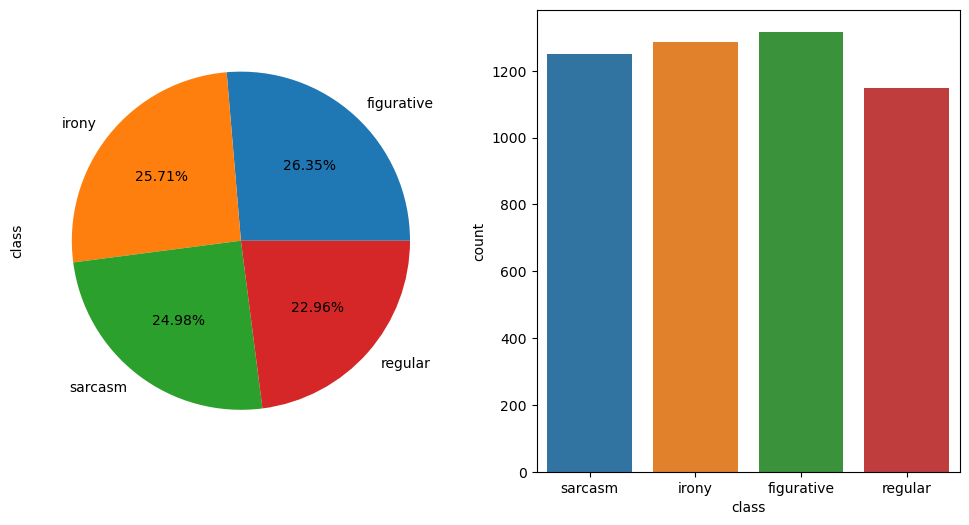

In [170]:
plt.rcParams['figure.figsize']=(12,6)
[plt.subplot(1,2,1),df["class"].value_counts().plot(kind ='pie',autopct = '%0.2f%%') ]
[plt.subplot(1,2,2),sns.countplot(data=df,x='class')]
plt.show()

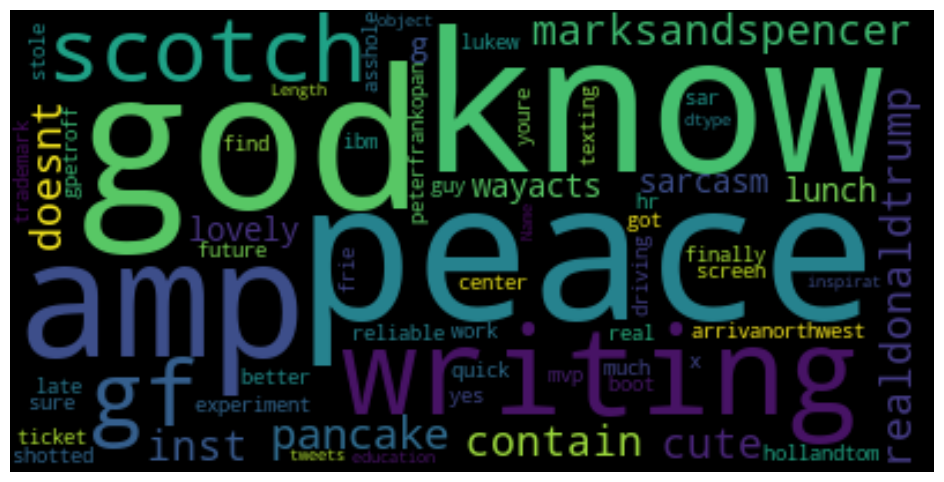

In [171]:
wc = WordCloud(stopwords=STOPWORDS,
    background_color='black', mode='RGB').generate(str(df["tweets"]))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [172]:
figurative = df[df['class']=='figurative']
irony = df[df['class']=='irony']
sarcasm = df[df['class']=='sarcasm']
regular = df[df['class']=='regular']

In [173]:
def wordcl(data,title):
    stop = STOPWORDS
    wc = WordCloud(background_color='black',stopwords=stop).generate(data)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(title)

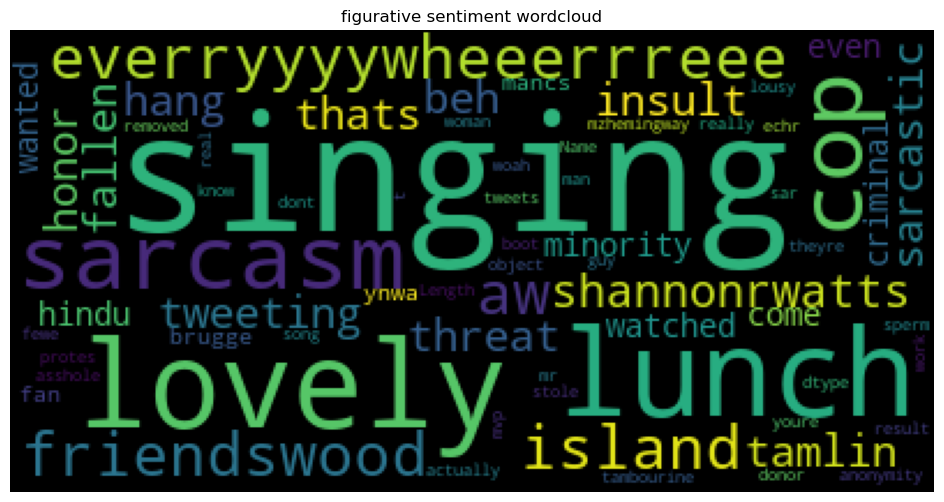

In [174]:
wordcl(str(figurative['tweets']),'figurative sentiment wordcloud')

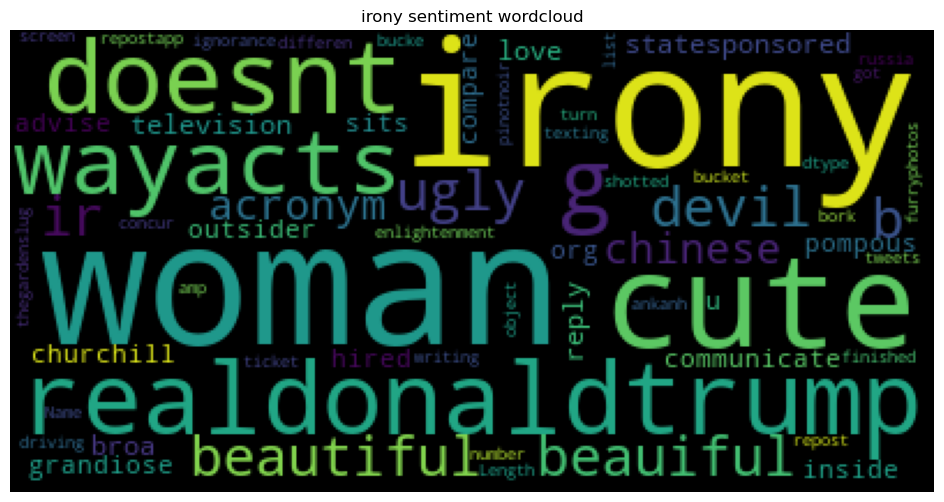

In [175]:
wordcl(str(irony['tweets']),'irony sentiment wordcloud')

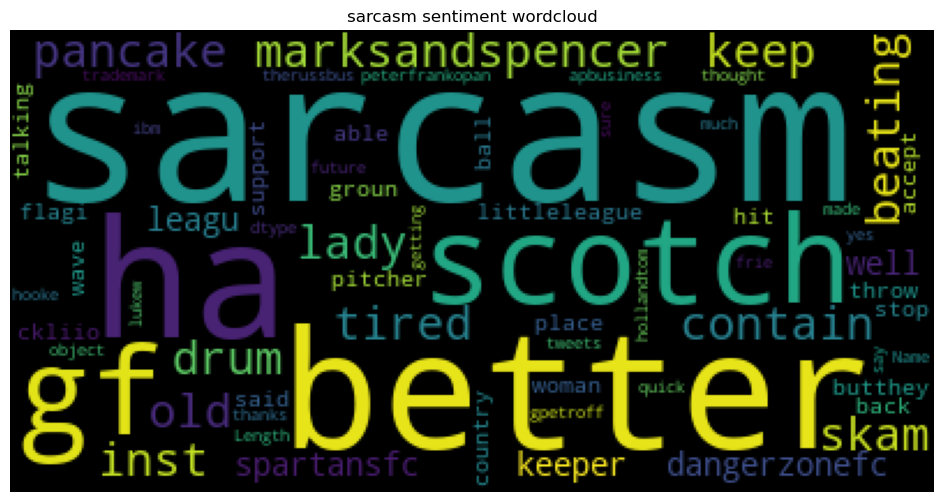

In [176]:
wordcl(str(sarcasm['tweets']),'sarcasm sentiment wordcloud')

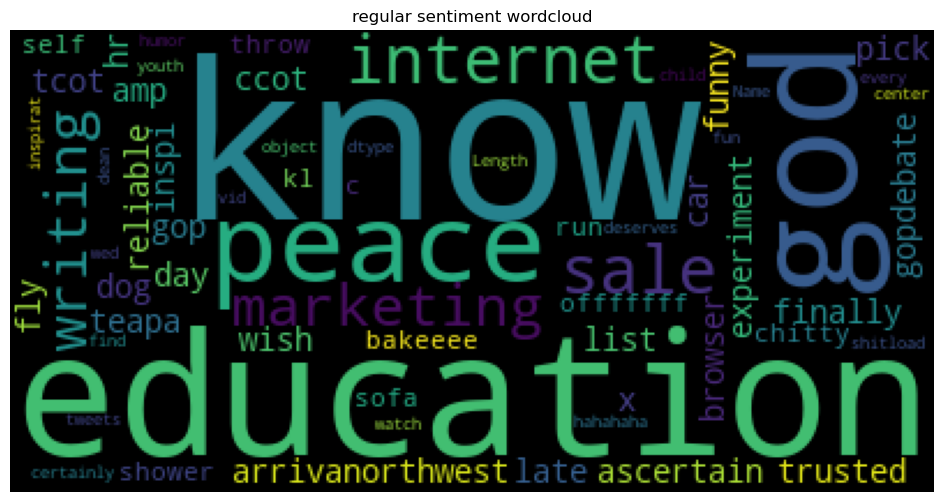

In [177]:
wordcl(str(regular['tweets']),'regular sentiment wordcloud')

In [178]:
#No. of words
df['length'] = df['tweets'].apply(lambda x:len(nltk.word_tokenize(x)))

In [179]:
df

,tweets,class,length
63550,gf scotch pancake marksandspencer contain inst...,sarcasm,10
27640,cute realdonaldtrump doesnt get wayacts like g...,irony,13
4073,lunch lovely sarcasm,figurative,3
47907,arrivanorthwest experiment x hr late reliable ...,regular,13
44837,god peace know god know peace amp finally get ...,regular,16
...,...,...,...
61819,peterfrankopan hollandtom yes sure much better...,sarcasm,14
25306,got texting amp driving ticket screen shotted ...,irony,15
79916,gpetroff lukew ibm quick trademark future frie...,sarcasm,12
2834,guy stole work boot youre real mvp asshole sar...,figurative,10


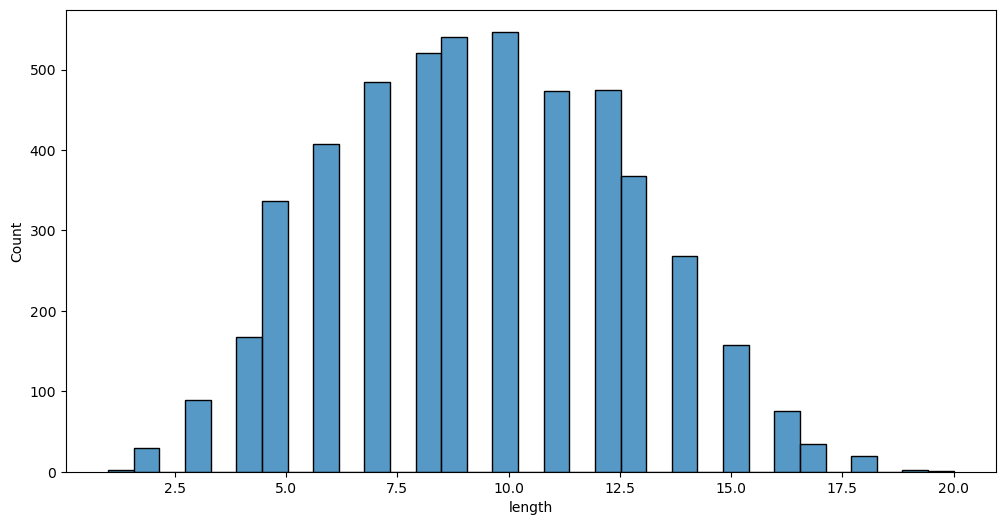

In [180]:
sns.histplot(df['length'])
plt.show()

this way of analysis is not showing any proper result.

In [181]:
df['lable'] = df['class'].map({'figurative':3,'irony':2,'sarcasm':1,'regular':0})

In [182]:
df

,tweets,class,length,lable
63550,gf scotch pancake marksandspencer contain inst...,sarcasm,10,1
27640,cute realdonaldtrump doesnt get wayacts like g...,irony,13,2
4073,lunch lovely sarcasm,figurative,3,3
47907,arrivanorthwest experiment x hr late reliable ...,regular,13,0
44837,god peace know god know peace amp finally get ...,regular,16,0
...,...,...,...,...
61819,peterfrankopan hollandtom yes sure much better...,sarcasm,14,1
25306,got texting amp driving ticket screen shotted ...,irony,15,2
79916,gpetroff lukew ibm quick trademark future frie...,sarcasm,12,1
2834,guy stole work boot youre real mvp asshole sar...,figurative,10,3


# Model Building

In [183]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from nltk.tokenize import word_tokenize
from sklearn.model_selection import GridSearchCV, KFold
from gensim.models import Word2Vec
from sklearn.svm import SVC
import pickle

In [184]:
# pip install xgboost

# Taking sample data

In [185]:
min_sample = 1000

df_figurative = df[df['class']=="figurative"].sample(min_sample,random_state=42)
df_irony = df[df['class']=="irony"].sample(min_sample,random_state=42)
df_regular = df[df['class']=="regular"].sample(min_sample,random_state=42)
df_sarcasm = df[df['class']=="sarcasm"].sample(min_sample,random_state=42)

In [186]:
df_balence = pd.concat([df_figurative,df_irony,df_regular,df_sarcasm],axis = 0)
df_balence['class'].value_counts()

figurative    1000
irony         1000
regular       1000
sarcasm       1000
Name: class, dtype: int64

In [187]:
X = df_balence['tweets']
Y = df_balence['lable']

# TF-IDF Uni-gram

In [188]:
def predict(model):
    model = model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    trainac = model.score(xtrain, ytrain)
    testac = model.score(xtest, ytest)
    
    print(f"Train accuracy {trainac}\nTest accuracy {testac}")
    
    print(classification_report(ytest, ypred))

In [189]:
tf =  TfidfVectorizer(ngram_range=(1,1))
x = tf.fit_transform(df_balence['tweets'])

#x = pd.DataFrame(x.toarray(), columns=tf.get_feature_names_out())
y = df_balence['lable']

In [190]:
x

<4000x11720 sparse matrix of type '<class 'numpy.float64'>'
	with 36117 stored elements in Compressed Sparse Row format>

In [191]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.35,random_state=1)

In [192]:
predict(AdaBoostClassifier())

Train accuracy 0.37461538461538463
Test accuracy 0.38142857142857145
              precision    recall  f1-score   support

           0       0.39      1.00      0.56       353
           1       0.69      0.07      0.12       332
           2       0.00      0.00      0.00       356
           3       0.34      0.45      0.39       359

    accuracy                           0.38      1400
   macro avg       0.35      0.38      0.27      1400
weighted avg       0.35      0.38      0.27      1400



In [193]:
predict(GradientBoostingClassifier())

Train accuracy 0.8373076923076923
Test accuracy 0.7264285714285714
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       353
           1       0.66      0.96      0.78       332
           2       0.65      0.92      0.76       356
           3       0.32      0.05      0.09       359

    accuracy                           0.73      1400
   macro avg       0.66      0.73      0.66      1400
weighted avg       0.65      0.73      0.65      1400



In [194]:
predict(DecisionTreeClassifier())

Train accuracy 0.9953846153846154
Test accuracy 0.6878571428571428
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       353
           1       0.66      0.79      0.72       332
           2       0.65      0.76      0.70       356
           3       0.34      0.22      0.27       359

    accuracy                           0.69      1400
   macro avg       0.66      0.69      0.67      1400
weighted avg       0.66      0.69      0.67      1400



In [195]:
predict(RandomForestClassifier())

Train accuracy 0.995
Test accuracy 0.7328571428571429
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       353
           1       0.66      0.97      0.79       332
           2       0.65      0.97      0.78       356
           3       0.25      0.01      0.03       359

    accuracy                           0.73      1400
   macro avg       0.64      0.74      0.65      1400
weighted avg       0.63      0.73      0.64      1400



In [196]:
predict(SVC())

Train accuracy 0.9903846153846154
Test accuracy 0.735
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       353
           1       0.66      0.99      0.79       332
           2       0.65      0.96      0.77       356
           3       0.26      0.02      0.03       359

    accuracy                           0.73      1400
   macro avg       0.64      0.74      0.65      1400
weighted avg       0.64      0.73      0.64      1400



In [197]:
predict(MultinomialNB())

Train accuracy 0.9730769230769231
Test accuracy 0.6478571428571429
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       353
           1       0.61      0.81      0.70       332
           2       0.63      0.62      0.62       356
           3       0.35      0.26      0.29       359

    accuracy                           0.65      1400
   macro avg       0.63      0.65      0.64      1400
weighted avg       0.63      0.65      0.64      1400



# CountVectorizer Uni-Gram

In [198]:
vc =  CountVectorizer(ngram_range=(1,1))
X = vc.fit_transform(df_balence['tweets'])

#x = pd.DataFrame(x.toarray(), columns=tf.get_feature_names_out())
Y = df_balence['lable']

In [199]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.35,random_state=1)

In [200]:
predict(AdaBoostClassifier())

Train accuracy 0.37461538461538463
Test accuracy 0.3821428571428571
              precision    recall  f1-score   support

           0       0.39      1.00      0.56       353
           1       0.70      0.07      0.13       332
           2       0.00      0.00      0.00       356
           3       0.34      0.45      0.39       359

    accuracy                           0.38      1400
   macro avg       0.36      0.38      0.27      1400
weighted avg       0.35      0.38      0.27      1400



In [201]:
predict(GradientBoostingClassifier())

Train accuracy 0.8096153846153846
Test accuracy 0.74
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       353
           1       0.66      0.99      0.79       332
           2       0.66      0.96      0.78       356
           3       0.45      0.04      0.07       359

    accuracy                           0.74      1400
   macro avg       0.69      0.75      0.66      1400
weighted avg       0.69      0.74      0.66      1400



In [202]:
predict(DecisionTreeClassifier())

Train accuracy 0.9953846153846154
Test accuracy 0.6978571428571428
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       353
           1       0.69      0.81      0.74       332
           2       0.65      0.73      0.69       356
           3       0.38      0.26      0.31       359

    accuracy                           0.70      1400
   macro avg       0.68      0.70      0.68      1400
weighted avg       0.68      0.70      0.68      1400



In [203]:
predict(RandomForestClassifier())

Train accuracy 0.9953846153846154
Test accuracy 0.7392857142857143
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       353
           1       0.67      0.99      0.80       332
           2       0.66      0.96      0.78       356
           3       0.46      0.03      0.06       359

    accuracy                           0.74      1400
   macro avg       0.69      0.75      0.66      1400
weighted avg       0.69      0.74      0.65      1400



In [204]:
predict(SVC())

Train accuracy 0.931923076923077
Test accuracy 0.7392857142857143
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       353
           1       0.66      0.99      0.80       332
           2       0.65      0.98      0.78       356
           3       0.22      0.01      0.01       359

    accuracy                           0.74      1400
   macro avg       0.63      0.75      0.65      1400
weighted avg       0.63      0.74      0.64      1400



In [205]:
predict(MultinomialNB())

Train accuracy 0.9680769230769231
Test accuracy 0.6757142857142857
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       353
           1       0.65      0.82      0.73       332
           2       0.64      0.71      0.67       356
           3       0.35      0.25      0.29       359

    accuracy                           0.68      1400
   macro avg       0.66      0.68      0.66      1400
weighted avg       0.66      0.68      0.66      1400



# as naive bays give good accuracy as compare to other model's we go for naive bays (countvectorizer)

# Naive bays model

In [206]:
df.head()

,tweets,class,length,lable
63550,gf scotch pancake marksandspencer contain inst...,sarcasm,10,1
27640,cute realdonaldtrump doesnt get wayacts like g...,irony,13,2
4073,lunch lovely sarcasm,figurative,3,3
47907,arrivanorthwest experiment x hr late reliable ...,regular,13,0
44837,god peace know god know peace amp finally get ...,regular,16,0


In [207]:
df.shape

(4999, 4)

In [208]:
df

,tweets,class,length,lable
63550,gf scotch pancake marksandspencer contain inst...,sarcasm,10,1
27640,cute realdonaldtrump doesnt get wayacts like g...,irony,13,2
4073,lunch lovely sarcasm,figurative,3,3
47907,arrivanorthwest experiment x hr late reliable ...,regular,13,0
44837,god peace know god know peace amp finally get ...,regular,16,0
...,...,...,...,...
61819,peterfrankopan hollandtom yes sure much better...,sarcasm,14,1
25306,got texting amp driving ticket screen shotted ...,irony,15,2
79916,gpetroff lukew ibm quick trademark future frie...,sarcasm,12,1
2834,guy stole work boot youre real mvp asshole sar...,figurative,10,3


In [209]:
vc =  CountVectorizer(ngram_range=(1,1))
X = vc.fit_transform(df['tweets']).toarray()
Y = df['lable']

In [210]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.35,random_state=42)

In [211]:
Y_train.value_counts()

3    891
2    828
1    786
0    744
Name: lable, dtype: int64

In [212]:
X_train[0]

array([0, 0, 0, ..., 0, 0, 0])

In [213]:
Model_multinominal = MultinomialNB(alpha=2)

In [214]:
# Model_multinominal = DecisionTreeClassifier()

In [215]:
Model_multinominal.fit(X_train, Y_train)       # Train model using pipeline
y_pred = Model_multinominal.predict(X_test)   # Evaluate model on testing set
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       404
           1       0.71      0.71      0.71       463
           2       0.66      0.68      0.67       457
           3       0.33      0.33      0.33       426

    accuracy                           0.67      1750
   macro avg       0.68      0.67      0.68      1750
weighted avg       0.67      0.67      0.67      1750



In [216]:
y_pred

array([2, 0, 2, ..., 3, 0, 1])

In [217]:
a=['Be aware  dirty step to get money  #staylight #staywhite  #sarcastic #moralneeded @… https://t.co/Oj6BdyX3WG']

In [218]:
a_transform=vc.fit_transform(a).toarray()

In [219]:
a_transform

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [220]:
# Model_multinominal.predict(a_transform)

In [221]:
y_pred

array([2, 0, 2, ..., 3, 0, 1])

In [222]:
print("Train_Accuracy :",Model_multinominal.score(X_train,Y_train))
print('Test_Accuracy :',Model_multinominal.score(X_test,Y_test))

Train_Accuracy : 0.9526008002462296
Test_Accuracy : 0.6714285714285714


# Pipeline

In [223]:
x1 = df['tweets']
Y1 = df['lable']

In [224]:
Xtrain,Xtest,Ytrain,Ytest= train_test_split(x1,Y1,test_size=0.34,random_state=42)

In [225]:
def clean(text:list):
     text = str(text)
     text = re.sub(r'[^\w\s]', '', text)
     text = re.sub(r'http\S+', '', text)
     text = text.lower()
     text = re.sub(r'\d+', '', text)
     text = ''.join([i for i in text if i.isalpha() or i.isspace()])
     tokens = nltk.word_tokenize(text)
     lemma= WordNetLemmatizer()
     tokens = [lemma.lemmatize(i) for i in tokens if not i in stopwords.words('english')]
     text = ' '.join(tokens)
#      text = 

     return text

In [226]:
with open('cleaner.pkl','wb') as file:
    pickle.dump(clean,file)

# Model Saving 

In [227]:
import pickle

In [228]:
with open('model.pkl','wb') as file:
    pickle.dump(Model_multinominal,file)

In [229]:
with open('cleaner.pkl','rb') as file:
    cleaner=pickle.load(file)     #Saved Pickle file for dimployments

In [230]:
a="Be aware  dirty step to get money  #staylight #staywhite  #sarcastic #moralneeded @… https://t.co/Oj6BdyX3WG'"

In [231]:
a=clean(a)
a

'aware dirty step get money staylight staywhite sarcastic moralneeded'

In [240]:
max_features=13709

In [241]:
vc=CountVectorizer(max_features=max_features,ngram_range=(1,1))

In [242]:
a_new=vc.fit_transform([a]).toarray()

In [243]:
a_new.shape[1]

9

In [244]:
if a_new.shape[1] < max_features:
    padding_size =max_features - a_new.shape[1]
    a_new = np.pad(a_new,((0,0), (0,padding_size)),'constant')

In [245]:
a_new.shape[1]

13709

In [246]:
a_new

array([[1, 1, 1, ..., 0, 0, 0]])

In [247]:
Model_multinominal.predict(a_new)

array([2])